In [109]:
import numpy as np
import scipy.stats as st

# Этот модуль содержит большое количество вероятностных распределений, сводную и частотную статистику, 
# корреляционные функции и статистические тесты, маскированную статистику, оценку плотности ядра, 
# квази-Монте-Карло и многое другое


# Интервальное оценивание 
1) Генеральной средней при известной дисперсии
2) Генеральной средней при неизвестной дисперсии
3) Генеральной дисперсии при небольшой выборке (<30)
4) Генеральной дисперсии при большой выборке (>30)
5) Генеральной доли или вероятности

## Оценивание генеральной средней

In [3]:
data = [1,2,3,4,5,6,7,8,9,10]
# Генеральная средняя может оцениваться по нормальному закону или по закону Стьюдента

# Функции соответственно:

# Построение интервалов для нормального закона
# Нормальный закон используем, если выборка большая или известная генеральная дисперсия
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

# Построение интервала для распределения Стьюдента
# Стьюдента используем, если выборка <30 или неизвестна дисперсия
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 
 

C:\Users\n3sm3\AppData\Local\Temp\ipykernel_19972\4281946493.py:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
C:\Users\n3sm3\AppData\Local\Temp\ipykernel_19972\4281946493.py:12: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


(3.3341494103866087, 7.665850589613392)

Параметры функций:

+ __alpha__ -  уровень значимости
+ __loc__ - выборочная средняя
+ __df__ - число степеней свободы, равное объему выборки минус единица
+ __scale__ - стандартная ошибка среднего; можно посчитать через __st.sem()__
     стандартная ошибка среднего - среднеквадратичное отклонение выборочной средней
     иногда называется средней квадратичной стандартной ошибки выборки - зависит от объема выборки
     
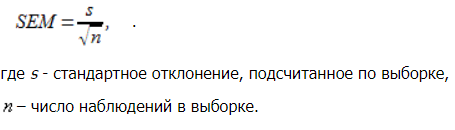

### Вероятность попасть в границы определенного интервала для генеральной средней

In [107]:
# Для нормального распределения Фишера 







In [108]:
#  Для распределения Стьюдента








## Оценивание генеральной дисперсии

Оценивание генерально дисперсии при малых выборках происходит через распределение хи-квадрат, 
а при выборках больше 30 - с помощью нормального распределения
#### Готовой функции нет, нужно прописывать формулу


In [117]:
# Для распределения хи-квадрат:

alpha = 0.05              # уровень значимости
n = 15                    # объем выборки
s2 = 400                  # выборочная дисперсия
df = n - 1                # степени свободы
# st.chi2.ppf() - Функция процентной точки
# Прописываем формулы как из учебника
upper = (n - 1) * s2 / st.chi2.ppf(alpha / 2, df)
lower = (n - 1) * s2 / st.chi2.ppf(1 - alpha / 2, df)
print(lower, upper)
# **иногда пишут не upper = (n - 1) * s2 / st.chi2.ppf(alpha / 2, df), а upper = n * s2 / st.chi2.ppf(alpha / 2, df)
# **аналогично как с поправкой на выборочную дисперсию
# Получаем интервал в котором лежит дисперсия

214.40373442084342 994.8965178774256


In [118]:
# Для нормального распределения:

alpha = 0.05               # уровень значимости
n = 200                    # объем выборки
s2 = 400                   # выборочная дисперсия
df = n - 1                 # степени свободы
# st.chi2.ppf() - Функция процентной точки
# Прописываем формулы как из учебника
upper = (((s2**(1/2)) * ((2*n)**(1/2))/(((2*n)-3)**(1/2)))+ st.norm.ppf(1 - (alpha / 2)))**2
lower = (((s2**(1/2)) * ((2*n)**(1/2))/(((2*n)-3)**(1/2)))- st.norm.ppf(1 - (alpha / 2)))**2
print(lower, upper)
# Получаем интервал в котором лежит дисперсия

328.169910742951 485.55834694881503


### Вероятность попасть в границы определенного интервала для генеральной дисперсии

In [58]:
# Для распределения хи-квадрат:

upper = 22                 # верхняя граница интервала для которго мы ищем вероятность
lower = 18                 # нижняя граница интервала для которого мы ищем вероятность
n = 15                      # объем выборки
s2 = 400                      # выборочная дисперсия

# Сначала находим значения x для распределения Пирсона
x1 = s2*n/(upper**2)
x2 = s2*n/(lower**2)
print(x1,x2)

# Далее эти значения подставляем в формулу по таблицам распределения хи-квадрат
alpha = st.chi2.cdf(x2, df = n-1) - st.chi2.cdf(x1, df = n-1)
print(alpha)
# Это вероятность для среднеквадратического отклонения!!!

12.396694214876034 18.51851851851852
0.39030326371153956


In [54]:
# Для нормального распределения:

upper = 22                 # верхняя граница интервала для которго мы ищем вероятность
lower = 18                 # нижняя граница интервала для которого мы ищем вероятность
n = 200                      # объем выборки
s2 = 400                      # выборочная дисперсия

# Сначала находим значения t для функции Лапласа
t1 = ((s2**(1/2)) / upper)*(2*n)**(1/2)-(((2*n)-3)**(1/2))
t2 = ((s2**(1/2)) / lower)*(2*n)**(1/2)-(((2*n)-3)**(1/2))
print(t1, t2)
# Далее эти значения подставляем в формулу по таблицам Лапласа
# Здесь немного путанница с табличными значениеми и знаками при аргументах функции - лучше проверять для точности
alpha = 1 - st.norm.cdf(t2) - st.norm.cdf(-t1)
print(alpha)
# Это вероятность для среднеквадратического отклонения!!!

-1.7430406633530957 2.297363377050946
-0.9485377193714972


## Оценивание генеральной доли

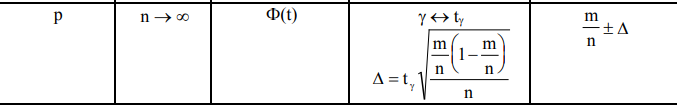

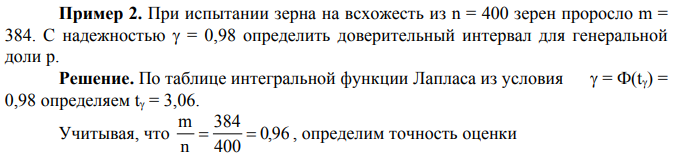
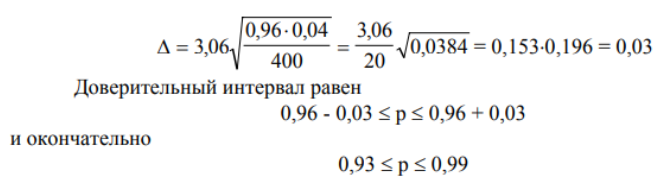